# **Car Evaluation Data set**
La base de datos de evaluación de automóviles se derivó de un modelo de decisión jerárquico simple originalmente desarrollado para la demostración

*   buying:             precio de compra
*   maint:              precio de mantemiento
*   doors:              numero de puertas
*   persons:            capacidad en terminos de personas
*   lug_boot:           tamaño maletero
*   safety:             seguridad estimada

La base de datos de evaluación de coches contiene ejemplos con la información estructural eliminada, es decir, relaciona directamente el Coche con los seis atributos de entrada: compra, mantenimiento, puertas, personas, maletero, seguridad.

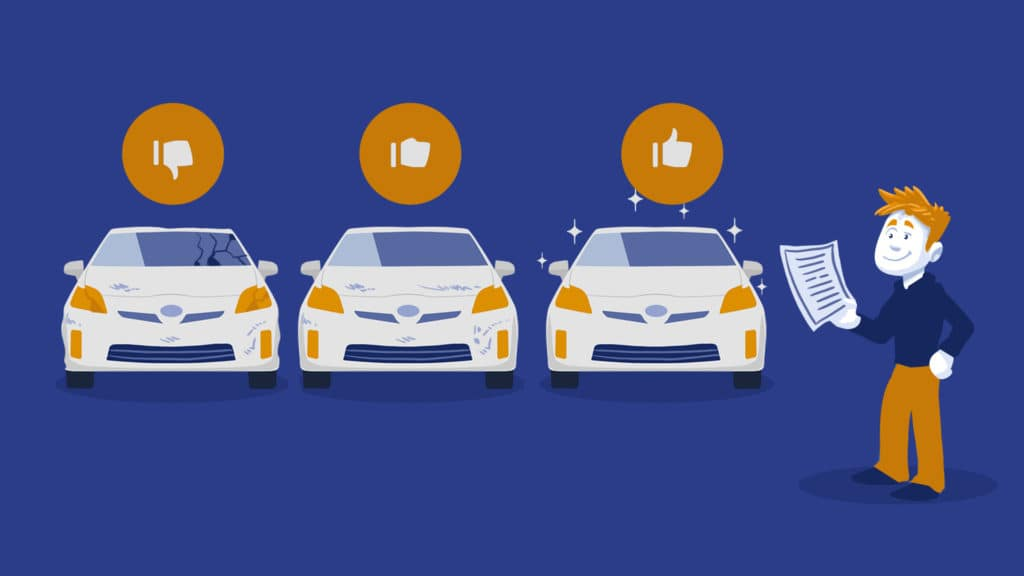

#**Lectura del dataset**

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# fetch dataset
car_evaluation = fetch_ucirepo(id=19)

# data (as pandas dataframes)
carX = car_evaluation.data.features
cary = car_evaluation.data.targets

# metadata
print(car_evaluation.metadata)

# variable information
print(car_evaluation.variables)


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'published_in': '8th Intl Workshop on Expert Systems and their Applications, Avignon, France', 'yea

In [3]:
df = carX.join(cary)
df.head(5)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
df.shape

(1728, 7)

In [5]:
df['buying'].unique()
df['buying'].value_counts()

,count
buying,
vhigh,432
high,432
med,432
low,432


In [6]:
df['maint'].unique()
df['maint'].value_counts()

,count
maint,
vhigh,432
high,432
med,432
low,432


In [7]:
df['persons'].unique()
df['persons'].value_counts()

,count
persons,
2,576
4,576
more,576


In [8]:
df['doors'].unique()
df['doors'].value_counts()

,count
doors,
2,432
3,432
4,432
5more,432


In [9]:
df['lug_boot'].unique()
df['lug_boot'].value_counts()

,count
lug_boot,
small,576
med,576
big,576


In [10]:
df1 = df.copy()

df1['doors'] = df1['doors'].map({'2': 0, '3': 1, '4': 2, '5more': 3})
df1['persons'] = df1['persons'].map({'2': 0, '4': 1, 'more': 2})
df1['buying'] = df1['buying'].map({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
df1['maint'] = df1['maint'].map({'vhigh': 3, 'high': 2, 'med': 1, 'low': 0})
df1['lug_boot'] = df1['lug_boot'].map({'small': 0, 'med': 1, 'big': 2})
df1['safety'] = df1['safety'].map({'low': 0, 'med': 1, 'high': 2})

df1.head(5)


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,0,0,unacc
1,3,3,0,0,0,1,unacc
2,3,3,0,0,0,2,unacc
3,3,3,0,0,1,0,unacc
4,3,3,0,0,1,1,unacc


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   int64 
 1   maint     1728 non-null   int64 
 2   doors     1728 non-null   int64 
 3   persons   1728 non-null   int64 
 4   lug_boot  1728 non-null   int64 
 5   safety    1728 non-null   int64 
 6   class     1728 non-null   object
dtypes: int64(6), object(1)
memory usage: 94.6+ KB


In [12]:
x = np.empty((1728,6), dtype='float')
x = df1.iloc[:,0:6]
y = np.empty((1728,1))
y = df1.iloc[:,-1].values

for i in range(1728):
  if y[i] == 'unacc':
    y[i] = 0

  if y[i] == 'acc':
    y[i] = 1

  if y[i] == 'good':
    y[i] = 2

# *SVD*



In [13]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [14]:
x_centered = np.empty((1728,6))
x_centered = x - x.mean(axis=0)

In [15]:
U, s, Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]
c3 = Vt.T[:, 2]

W2 = Vt.T[:, :3]
X2D = x_centered.dot(W2)

In [16]:
print(X2D.head(5))

     0    1    2
0 -1.5  1.5 -1.5
1 -1.5  1.5 -1.5
2 -1.5  1.5 -1.5
3 -1.5  1.5 -1.5
4 -1.5  1.5 -1.5


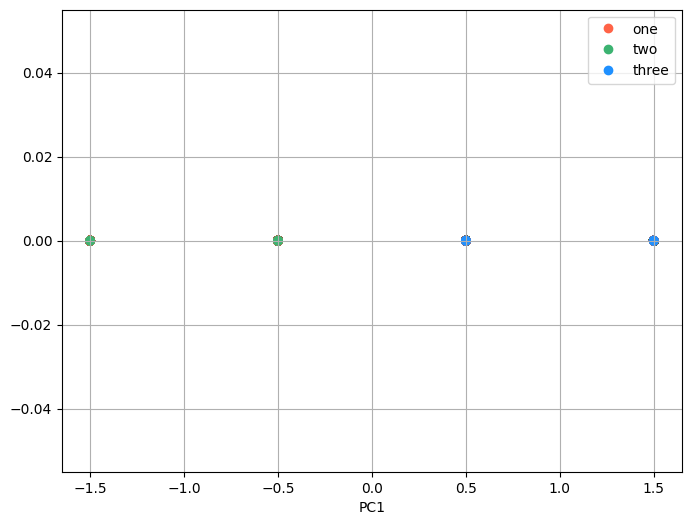

In [34]:
classes = ['one', 'two', 'three']
fig = plt.figure(figsize=(8,6))
my_cmap = ListedColormap(['#FF6347', '#3CB371', '#1E90FF'])
scatter = plt.scatter(X2D.iloc[:,0],np.zeros((1728,1)), c=y, cmap=my_cmap)
plt.xlabel('PC1')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

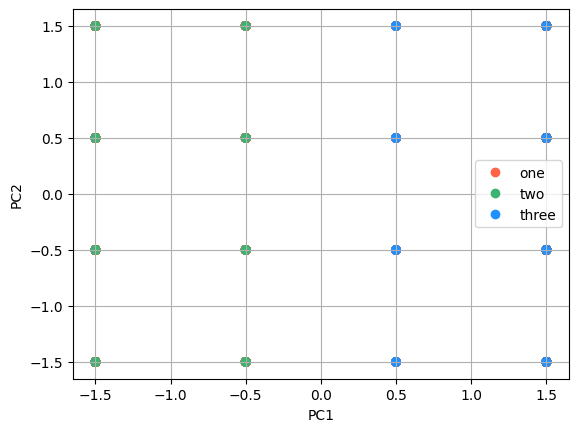

In [35]:
scatter = plt.scatter(X2D.iloc[:,0],X2D.iloc[:,1], c = y, cmap=my_cmap)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

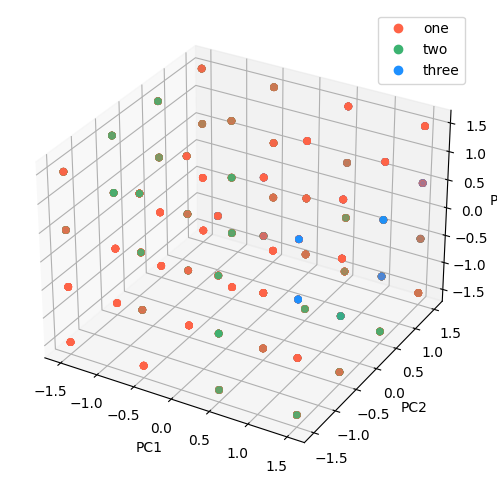

In [36]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection = '3d')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.scatter(X2D.iloc[:,0], X2D.iloc[:,1], X2D.iloc[:,2], c=y, cmap=my_cmap)

plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.show()

In [20]:
U, s, Vt = np.linalg.svd(x_centered)
total_variance = np.sum(s ** 2)
explained_variance_ratio = (s ** 2) / total_variance
explained_variance_percentage = explained_variance_ratio * 100
for i, var in enumerate(explained_variance_percentage):
    print(f"Componente {i+1}: {var:.2f}% de la varianza explicada")


Componente 1: 21.74% de la varianza explicada
Componente 2: 21.74% de la varianza explicada
Componente 3: 21.74% de la varianza explicada
Componente 4: 11.59% de la varianza explicada
Componente 5: 11.59% de la varianza explicada
Componente 6: 11.59% de la varianza explicada


# *PCA SKLEARN*

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(x)
X2D_sklearn = pca.transform(x)

In [22]:
pca.explained_variance_ratio_

array([0.2173913, 0.2173913, 0.2173913])

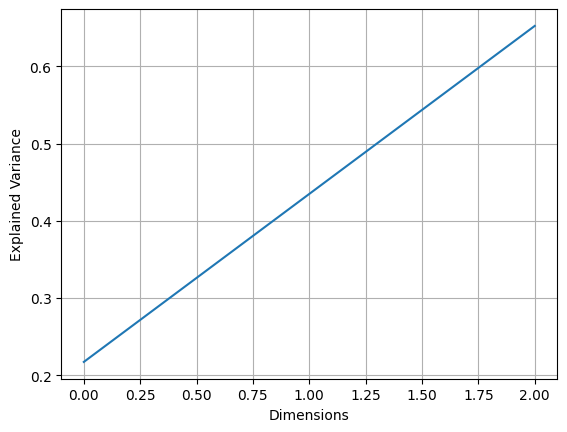

In [23]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)

plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.grid()
plt.show()

In [24]:
pca = PCA(n_components = 2)
pca.fit(x)
X2D_sklearn = pca.transform(x)
pca.explained_variance_ratio_

array([0.2173913, 0.2173913])

In [25]:
pca = PCA(n_components = 1)
pca.fit(x)
X2D_sklearn = pca.transform(x)
pca.explained_variance_ratio_

array([0.2173913])